## Assignment 1 - Deep Learning
### Name: Sachin K Manjhi 
### Question 3 : Implement the logistic regression in python for digit classfication.

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse

from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 20
input_dim = 784

In [3]:
# Load the MNIST dataset and split into test and train
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Data Processing
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices (1-hot encoded)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
#Check shape of the training dataset
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

In [8]:
# Define the softmax function
def softmax(a):
    exps = np.exp(a)
    soft_max = exps / np.sum(exps)
    return soft_max

In [9]:
def getLLGradient(w,x,y):
    N = x.shape[0]             # the number of training examples
    a = np.dot(x,w)            # a defined as a linear function of x
    yhat = softmax(a)          # output is the softmax(a)
    
    loss = (-1/N)*np.sum(y*np.log(yhat)) + (1/2)*np.sum(w*w)    
    grad = (-1/N)*np.dot(x.T,(yhat - y)) + (1/2)*w
    
    return loss,grad

In [15]:
epochs = 15
learningRate = 0.1            # 0.001, 0.01, 0.05, 0.1
batchSize = 1024                 # 1 , 32, 128, 1024.
iterations = int(X_train.shape[0]/batchSize)

In [16]:
# Initialize the weights with random values
np.random.seed(2019)
w = np.random.rand(X_train.shape[1],Y_train.shape[1])

losses = []
loss = 0

for i in range(0,iterations):
    #choose a min-batch of samples
    min_range=iterations*batchSize
    max_range=(iterations+1)*batchSize - 1
    X_batch = X_train[min_range:max_range,:]
    Y_batch = Y_train[min_range:max_range,:]
       
    loss,grad = getLLGradient(w,X_batch,Y_batch)
    w = w - (learningRate * grad)
    #print(i , loss)
#print("Epoch:",e, "Loss:", loss)
    losses.append(loss)

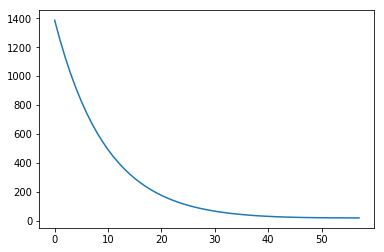

In [17]:
# Plot the loss vs number of iterations
plt.plot(losses)

In [23]:
def getAccuracy(X,Y):  
    probs = softmax(np.dot(X,w))
    preds = np.argmax(probs,axis=1)
    accuracy = np.mean(preds == Y)
    return accuracy

In [25]:
print('Training Accuracy: ', getAccuracy(X_train,y_train) )
print('Test Accuracy: ', getAccuracy(X_test,y_test) )

Training Accuracy:  0.0084
Test Accuracy:  0.0086
